In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [125]:
df = pd.read_csv("CleanData.csv")
print(df.head())


   cough  fever  sore_throat  shortness_of_breath  head_ache  \
0      1      0            0                    0          0   
1      1      1            0                    0          0   
2      0      0            0                    0          0   
3      0      0            0                    0          0   
4      0      0            0                    0          0   

   age_60_and_above  gender  Abroad  Contact  No_activite  corona_result  
0                 0       1       1        0            0              0  
1                 0       1       0        0            1              0  
2                 0       1       0        0            1              1  
3                 0       1       0        0            1              1  
4                 0       1       0        0            1              1  


In [94]:
print(df.shape)
print(df.info())

(47998, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47998 entries, 0 to 47997
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   cough                47998 non-null  int64
 1   fever                47998 non-null  int64
 2   sore_throat          47998 non-null  int64
 3   shortness_of_breath  47998 non-null  int64
 4   head_ache            47998 non-null  int64
 5   age_60_and_above     47998 non-null  int64
 6   gender               47998 non-null  int64
 7   Abroad               47998 non-null  int64
 8   Contact              47998 non-null  int64
 9   No_activite          47998 non-null  int64
 10  corona_result        47998 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB
None


In [95]:
print(df.describe())

              cough         fever   sore_throat  shortness_of_breath  \
count  47998.000000  47998.000000  47998.000000         47998.000000   
mean       0.750740      0.386204      0.039397             0.032189   
std        0.432589      0.486883      0.194541             0.176503   
min        0.000000      0.000000      0.000000             0.000000   
25%        1.000000      0.000000      0.000000             0.000000   
50%        1.000000      0.000000      0.000000             0.000000   
75%        1.000000      1.000000      0.000000             0.000000   
max        1.000000      1.000000      1.000000             1.000000   

          head_ache  age_60_and_above        gender        Abroad  \
count  47998.000000      47998.000000  47998.000000  47998.000000   
mean       0.049523          0.107963      0.638068      0.381828   
std        0.216959          0.310337      0.480564      0.485840   
min        0.000000          0.000000      0.000000      0.000000   
25%   

In [142]:
X = df.drop('corona_result',axis=1).values
Y = df['corona_result'].values

print(X.shape)
print(Y.shape)



(47998, 10)
(47998,)


In [205]:
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_samples=20, centers=2, n_features=2, random_state=0)
print(X.shape)
print(Y)

(20, 2)
[0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0]


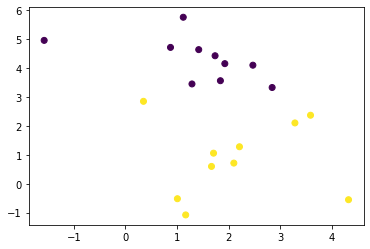

In [206]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()


(300, 3)
[0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 1 0 1]


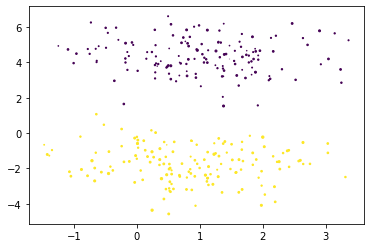

In [207]:
X, Y = make_blobs(n_samples=300, centers=2, n_features=3, random_state=0)
print(X.shape)
print(Y)

plt.scatter(X[:,0],X[:,1],X[:,2], c=Y)
plt.show()

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.3, random_state=42)

#print("done")

done


In [147]:
#Model Selection- Linearly Saparable so Model that can be use are : Knn model,Logistic,LinearSVC,SVM 

In [160]:
# SUPPORT VECTOR MACHINE

#svm = SVC()  
#svm.fit(X_train,Y_train);
#print(svm.score(X_train,Y_train))

#y_pred = svm.predict(X_test)
#print(svm.score(X_test,Y_test))

#print(classification_report(Y_test, y_pred))


1.0
0.9888888888888889
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.98      1.00      0.99        47

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



In [161]:
#Linear Support Vector Classifier

#lsvm = LinearSVC()

#lsvm.fit(X_train, Y_train)
#print(lsvm.score(X_train,Y_train))

#y_pred = lsvm.predict(X_test)

#print(lsvm.score(X_test,Y_test))

#print(classification_report(Y_test, y_pred))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        47

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [209]:
# Logistic Regression -Classification

param_grid = {'C': np.arange(1, 50)}
logreg = LogisticRegression()
lg_cv = GridSearchCV(logreg, param_grid,cv=5)

# Fitting and Predicting 
lg_cv.fit(X_train, Y_train)

print(lg_cv.best_params_)
print(lg_cv.best_score_)



{'C': 1}
1.0


In [210]:
# Predicting
y_pred = lg_cv.predict(X_test)

print(lg_cv.score(X_train,Y_train))
print(lg_cv.score(X_test,Y_test))
 
print(classification_report(Y_test, y_pred))


1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        47

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



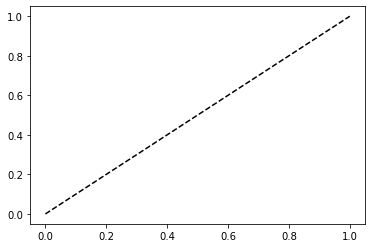

In [211]:
# Fitting and Predicting Probability

logreg.fit(X_train,Y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')


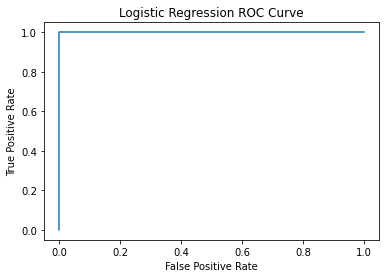

In [212]:
plt.plot(fpr, tpr, label ='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show()

In [213]:
roc_auc_score(Y_test, y_pred_prob)

1.0

In [218]:
# Intercept Size
print(logreg.coef_)

[[-0.26904954 -2.23120361  0.29580416]]


In [219]:
# Intercept Size
print(logreg.intercept_)

[2.1604956]
